# COGS 118A- Project Checkpoint

# Names

- Tianyu Yu
- Ziheng Chen 
- Zhou Sun
- Muhan He

# Abstract 
This project aims to create a model to recognize German traffic signs when given traffic signs pictures. The project data consists of images for both training and testing and class labels for each photo. Class labels are used for recognizing the traffic signs; they are descriptions of the traffic signs such as "No entry" or "Turn left ahead." We will shuffle the training data first and then one-hot encoding the labels. After that, we will use the training data and encoded labels to train multiple machine learning models and pick the one with the highest accuracy. We will measure the performance of the models using accuracy, which is calculated by the number of correct predictions / total number of data. Finally, we will run the best performance model on different datasets to report its performance under various conditions.

# Background

Traffic sign recognition has become a more popular topic in the past decade. With the enhancement of advanced technology, people have put eyes on automated vehicles. In order for the vehicles to be automated, the vehicle itself has to understand all the signs and the road traffic in real time. Thus the vehicle itself can act as a driver and does not require any input or interference by human. Therefore, for the safety of the passengers, traffic sign recognition is significantly important for autonomous driving.

Traffic signs recognition needs two parts: localization and recognition. Localization is for detecting and localizing where a traffic sign is in the image, and recognition is for identifying the sign. Also, because many images are low contrast and hard to distinguish, we can use “an algorithm called Contrast Limited Adaptive Histogram Equalization (CLAHE)” to increase the contrast. Thus, we can make images easier for computer to recognize[1].

Research in the past has conducted on the traffic sign recognition and one difficulty that always arise is the lighting conditions in the outdoor environments[2]. This study considers the problem of lighting conditions and try to resolve it with a computer algorithm. The study recognizes that lighting conditions are changeable and not controllable, thus it is not possible to generate a complete model of all possibilities of the sign’s appearance[2]. The study proposed an algorithm that takes only the Hue and Saturation components in order to avoid lighting condition, this way, the recognition will be less affected by the lighting conditions[2].

Another paper utilizes the live speed of cars to help improve the recognition algorithm [3]. By doing this, they can speed up the algorithm while remain the high accuracy.

# Problem Statement

Our goal is to use the data from our dataset to build a CNN to accurately classify traffic signals that can be found on German roads. Autonomous vehicle technology is rapidly improving, and having the ability to recognize a traffic sign, and being able to act upon is an indispensable part of such technology. The dataset will be divided into a training and test set. The training set will be used to train the CNN, and the testing set will be used to measure the accuracy of the CNN model. The success of the model will be measured through the accuracy with which it classifies the image of the traffic sign passed into the model. The overall goal is to reach 98% accuracy with the CNN. The data used will be German traffic signs only, as each country has different types of traffic signals. However, the same approach can be used to train a CNN to classify signs from different countries, as long as the dataset contains the traffic signs from that country specifically. 

# Data

Link tof the dataset: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Train.csv

The dataset we are using has: 
- 43 Classes, i.e. 43 different German Traffic Signs including, but are not limited to speed limits, warnings, yield etc. 
- More than 50,000 total images of traffic signals, procured from locations around Germany
- Each observation is one of the images in the dataset, which belongs to one of the 43 classes

An entry in the Train, Test and Meta CSVs contain: 
- the size of the image
- the Region of Interest (Roi)
- the class id (which traffic sign it is)
- the path to the image 

In [1]:
# Import Visualization Tools
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Assigning Dataset File Paths
data_dir = 'Data/'
train_path = 'Data/Train/'
test_path = 'Data/Test/'
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [2]:
# read the 3 csv files
df_train = pd.read_csv('Data/Train.csv')
df_test = pd.read_csv('Data/Test.csv')
df_meta = pd.read_csv('Data/Meta.csv')

In [3]:
# check on the df_train
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


Each observation in df_train contains 8 features. The width is the width of the image corresponding to the path of the image. The height is the height of the image. Roi.X1 is the upper left x coordinate of the sign on the image. Roi.Y1 is the upper left y coordinate of the sign of the image. Roi.X2 is the lower right x coordinate of the sign of the image. Roi.Y2 is the lower right y coordinate of the sign of the image. ClassId is the class of provided image and path is the path in the folder to the corresponding image.

In [4]:
# check on the df_test
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


Similar to df_train, each observation also contains 8 features in df_test. The width is the width of the image corresponding to the path of the image. The height is the height of the image. Roi.X1 is the upper left x coordinate of the sign on the image. Roi.Y1 is the upper left y coordinate of the sign of the image. Roi.X2 is the lower right x coordinate of the sign of the image. Roi.Y2 is the lower right y coordinate of the sign of the image. ClassId is the class of provided image and path is the path in the folder to the corresponding image.

In [5]:
# check on the df_meta
df_meta.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


Each observation in df_meta contains 5 features. The path is the path of the corresponding image. The ClassId is the class of provided image. The ShapeId is the shape of sign, 0 for triangle, 1 for circle, 2 for diamond, 3 for hexagon, 4 for inverse triangle. The ColorId is the color of the sign, 0 for red, 1 for blue, 2 for yellow, 3 for white. The SignId is the SignID by the German Traffic Rule.

In [6]:
# 2 df have the same shape
print(df_train.shape, df_train.shape)

(39209, 8) (39209, 8)


They look like the same thing with different selections from one bigger data.

In [7]:
type(df_train['ClassId'][0]), type(df_test['ClassId'][0])

(numpy.int64, numpy.int64)

As we seen in both df_test and df_train, the classIds are types of numpy.ind64. However, they are supposed to represent a class of image not a numerical value of image. Thus we need to change the ClassIds to strings

In [8]:
#df_train['ClassId'] = df_train['ClassId'].astype(str)
#df_test['ClassId'] = df_test['ClassId'].astype(str)
#type(df_train['ClassId'][0]), type(df_test['ClassId'][0])

In [9]:
df_train['ClassId'].unique()

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [10]:
df_test['ClassId'].unique()

array([16,  1, 38, 33, 11, 18, 12, 25, 35,  7, 23,  4,  9, 21, 20, 27,  3,
       13, 10,  5, 17, 34,  2,  8, 30, 24, 15, 26, 28, 22, 14, 32, 29,  6,
       36, 40, 41, 31, 19,  0, 39, 42, 37], dtype=int64)

Now all of the values in 'ClassId' are in strings, but we want to organize the number so that every values are made of 2 digits

In [11]:
# clean the classID so that both df_train and df_test have 2 digits in ClassIds
#for i in range(0, len(df_train['ClassId'])):
#   if len(df_train['ClassId'][i]) == 1:
#        df_train['ClassId'][i] = '0' + df_train['ClassId'][i]
#for i in range(0, len(df_test['ClassId'])):
#    if len(df_test['ClassId'][i]) == 1:
#       df_test['ClassId'][i] = '0' + df_test['ClassId'][i]
        
#df_train['ClassId'].unique()

In [12]:
df_test['ClassId'].unique()

array([16,  1, 38, 33, 11, 18, 12, 25, 35,  7, 23,  4,  9, 21, 20, 27,  3,
       13, 10,  5, 17, 34,  2,  8, 30, 24, 15, 26, 28, 22, 14, 32, 29,  6,
       36, 40, 41, 31, 19,  0, 39, 42, 37], dtype=int64)

In [13]:
# columns' info
df_train.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


This shows that there are 39209 observations in the df_train dataset. The average width of the images in df_train are around 50.8. The average height of the images in df_train is around 50.3. Demonstrating that the images in df_train are spare shape images. The average upper left x coordinate of the sign of the image is 5.99 and the average upper left y coordinate of the sign of the iamge is 5.96. The average lower right x coordinate of the sign of the image is 45.20 and the average lower right y coordinate of the sign of the image is 44.73.

In [14]:
# columns' info
df_test.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


This shows that there are 39209 observations in the df_test dataset. The average width of the images in df_train are around 50.5. The average height of the images in df_train is around 50.4. Demonstrating that the images in df_test are aslo square shape. The average upper left x coordinate of the sign of the image is 5.99 and the average upper left y coordinate of the sign of the iamge is 5.98. The average lower right x coordinate of the sign of the image is 44.86 and the average lower right y coordinate of the sign of the image is 44.76. Both the upper left xy coordinate and the lower right xy coordinate shows similar  average values, this could implies that the signs are at about the same position in each image in both df_test and df_train.

In [15]:
# There is no nan value for both df
print(df_train.isnull().values.any(), df_test.isnull().values.any())

False False


Since there are no null values in both df_train and df_test. We don't need to remove any observations that are not applicable. Thus we can move on to visualizations.

In [16]:
# Finding Total Number of Classes/Types of Signs
NUM_CLASSES = len(os.listdir(train_path))
NUM_CLASSES

43

In [17]:
# '.DS_Store' is not part of the Classes, we can run "find . -name "*.DS_Store" -type f -delete" to delete it

In [18]:
# Create Human Readable Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

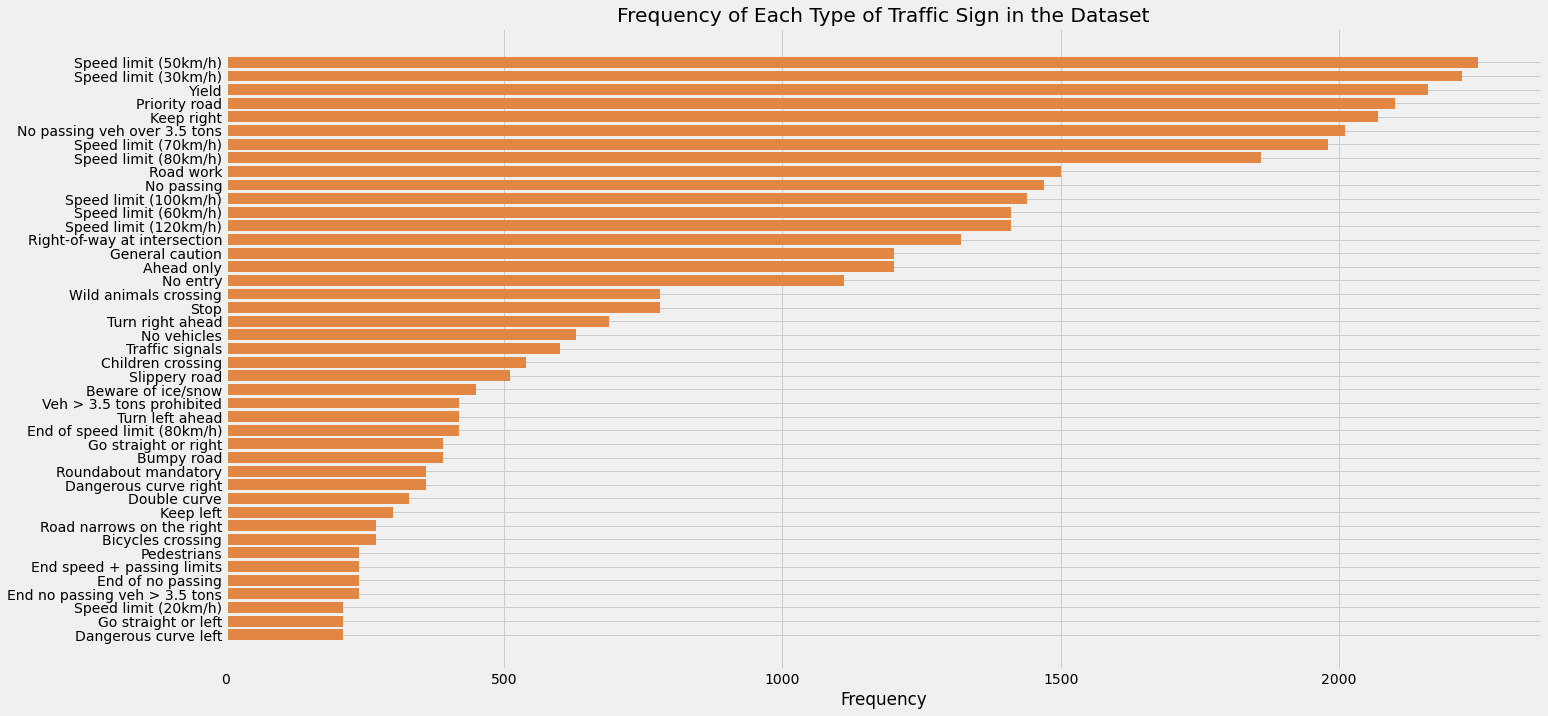

In [19]:
# Prep data for visualization
folders = os.listdir(train_path)

train_num = []
class_num = []

for folder in folders:
    # Append the number of each class of images to an array
    train_num.append(len(os.listdir(train_path + '/' + folder)))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset by number of images per class
sorted_pairs = sorted(zip(train_num, class_num))
tuples = zip(*sorted_pairs)
train_num, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the frquency of each class of images
plt.figure(figsize=(21,11))
plt.xlabel("Frequency")  
plt.title("Frequency of Each Type of Traffic Sign in the Dataset")
# plt.bar(class_num, train_num, color='#e28743')
plt.barh(class_num, train_num, color='#e28743');
# plt.xticks(class_num, rotation=90)

As we can see, speed limit sign occurs more often than dangerous curve signs.

Before jumping into model training section. We want to visualize example of image of a traffic sign in our training dataset and testing set.

# Proposed Solution

Our proposed solution is to use a CNN to classify the images in the dataset. The images themselves would need to be converted to a format such that the image data can be fit into numpy arrays. Additionally, the labels of the dataset would need to be one-hot encoded so that calculations and predictions can be made. The model itself would be made using libraries such as tensorflow or keras, and the image data would need to be shuffled for the models to be trained properly. A portion of the dataset would be used as training data while the other will be used as testing/validation data. The solution will be tested by comparing the predicted ID of an image with the image’s actual class ID to calculate the accuracy of the model. The benchmark model against which our solution will be tested is a model by Shivank Sharma with a 98% accuracy: https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy

# Evaluation Metrics

One of the evaluation metrics we would use to evaluate performance of our model is to figure out the accuracy of prediction for the trained model. Firstly, we could calculate accuracy by comparing predicted results to our test templet, and then compare the accuracy with the benchmark model’s accuracy(98%). The average accuracy of our predicted model should be close to or more than 98%, which should be close or even better to the benchmark model's accuracy.

We calculate Accuracy by dividing the number of accurately predicted records by the total number of records. In our project, we use model.fit() to gain the metrics that we need to calculate accuracy, because it generates output predictions for the input samples and display the accuracies for our predicted data and tested data.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



20 Train/20/00020_00000_00001.png


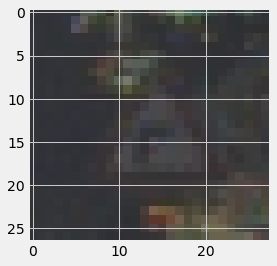

In [20]:
print(df_train['ClassId'][1], df_train['Path'][1])
img = Image.open('Data/' + df_train['Path'][1])
plt.imshow(img)

1 Test/00001.png


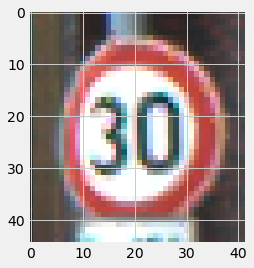

In [21]:
print(df_test['ClassId'][1], df_test['Path'][1])
img = Image.open('Data/' + df_test['Path'][1])
plt.imshow(img)

In [22]:
# Import Modeling Tools
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

#### Collect the Training Data from Train.csv

In [23]:
image_data = []
image_labels = []

for i in range(NUM_CLASSES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


#### Shuffle the Training Data 

In [24]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

#### Split the Data into Training and Testing Sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


#### One-Hot Encode the Labels 

In [26]:
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

print(y_train.shape)
print(y_test.shape)

(27446, 43)
(11763, 43)


#### Create the Sequantial Keras CNN with Hyperparameters 

In [30]:
max_pool = keras.layers.MaxPool2D(pool_size=(2, 2))
layer_1 = keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels))
layer_2 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')
layer_3 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')
layer_4 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu')

model = keras.models.Sequential([    
    layer_1,
    layer_2,
    max_pool,
    keras.layers.BatchNormalization(axis=-1),

    layer_3,
    layer_4,
    max_pool,
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 128)        

# Ethics & Privacy

#### Ethics Concerns
Lack of transparency of AI tools/ lack of trust: Since the process of AI decision-making is not visible to humans, so AI’s intelligence so far is not very reliable compared to humans’ intelligence to make some crucial decisions. Although it’s a concern if our model is used as part of functions in autonomous vehicles, our model can also be used as an assistance for drivers to help them make better decisions on the road. Thus, our project could avoid potential risks in the usage of AI tools.

AI is not neutral: Since AI decision-making is largely dependent on the datasets we trained and used, there could be some bias like too much data for majorities and too little data for minorities in a category. Although our dataset involves more than 40 classes of traffic signs and more than 50000 observations, there’s no bias on distributions of different classes of traffic signs, so our AI model will be relatively neutral.

Disappearance of jobs: Based on the AI functions of our project, which is recognizing traffic lights and giving instructions like “No entry” or “Turn left ahead”, our project might be used as a traffic indicator for passengers or a part of functions in autonomous vehicles in German. The potential impact of our project on the job market is substitution of traffic police or professional drivers in German.

Privacy & public rights/security violation: Our project only uses data of traffic signs in German. There’s no threats to personal privacy or public security since it doesn’t involve sensitive information, and researchers in our group have no bias to datasets or reason to conduct deception in the project.

Beneficence: The usage of our model is to help construct a better traffic-decision system in autonomous vehicles or give suggestions and reminders to drivers, which has no harm to our research subjects like users of autonomous vehicles and drivers.

Justice: Since our project has no involvement in commercial interests to our researchers, we have no concerns on justice of our project.

# Team Expectations 

* *Be on time to attend group discussions*
* *Be respectful to each other*
* *Be responsible for individual parts*
* *Be open minded about others' ideas*
* *Be aware of the dead lines*
* *Be ready to learn during the project*
* *Be prepared for challenges*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 04/24  |  9 PM |  Brainstorm topics/questions (all)  | Search for datasets; Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research; finish the proposal - and submit to the git repo| 
| 04/29  |  9 PM |  Do background research on topic (all) | Clean the data; Get training and testing data; finish peer review of proposals | 
| 05/13  | 9 PM  | Review and update the proposal  | Discuss image recognition and possible analytical approaches; Finish and submit the Checkpoint   |
| 05/20  | 9 PM  | do some EDA (all) | Review/Edit EDA; Peer review of checkpoint   |
| 05/30  | 9 PM  | Finalize wrangling/EDA; Begin programming for project (all) | Discuss/edit project code |
| 06/03  | 9 PM  | Complete analysis; Finish draft (all)| Discuss/edit full project |
| 06/08  | Before 11:59 PM  | NA | Final project; team eval survey  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Dh, Rosebrock, A., Rathod, Y., Gulzar, S., Andrey, Cassar, J. P., Klimchuk, N., Holdroyd, T., Zizo, Trevor, Andy, Davi, Butts, N., Suraj, Denis, Shahril, Biram, Ikram, A., Keith, … Shamsudheen. (2022, January 31). Traffic sign classification with Keras and deep learning. PyImageSearch. Retrieved April 24, 2022, from https://pyimagesearch.com/2019/11/04/traffic-sign-classification-with-keras-and-deep-learning/#download-the-code
<br> 
<a name="admonishnote"></a>2.[^](#admonish): Escalera, A. de la, Armingol, J. M., &amp; Mata, M. (2003, January 15). Traffic sign recognition and analysis for intelligent vehicles. Image and Vision Computing. Retrieved April 24, 2022, from https://www.sciencedirect.com/science/article/abs/pii/S0262885602001567?via%3Dihub <br>
<a name="admonishnote"></a>3.[^](#admonish): Shustanov, A., &amp; Yakimov, P. (2017). A method for traffic sign recognition with CNN using GPU. Proceedings of the 14th International Joint Conference on e-Business and Telecommunications. https://doi.org/10.5220/0006436100420047  <br>